In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
data=pd.read_csv('50_Startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data=data.rename(columns={'R&D Spend':'rd','Administration':'admin','Marketing Spend':'market_spend','State':'state','Profit':'profit'})

In [5]:
data.isna().sum()

rd              0
admin           0
market_spend    0
state           0
profit          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rd            50 non-null     float64
 1   admin         50 non-null     float64
 2   market_spend  50 non-null     float64
 3   state         50 non-null     object 
 4   profit        50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
data.describe()

,rd,admin,market_spend,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot:>

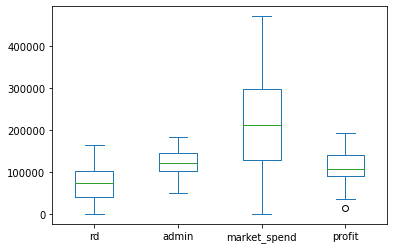

In [8]:
data.plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x2708741ec40>,
 'caps': [<matplotlib.lines.Line2D at 0x27087422250>,
 'boxes': [<matplotlib.lines.Line2D at 0x270873e8f70>],
 'medians': [<matplotlib.lines.Line2D at 0x270874227f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x270874535e0>],
 'means': []}

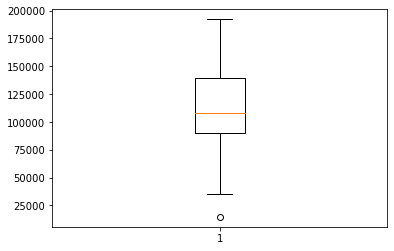

In [11]:
box=plt.boxplot(data['profit'])
box

In [ ]:
# we can use get_ydata of list comprehension method

In [13]:
# [item.get_ydata() for item in box['fliers']]

[array([14681.4])]

In [9]:
q1=data["profit"].quantile(.25)
q3=data['profit'].quantile(.75)
iqr=q3-q1
lower=q1-(1.5*iqr)
lower

15698.290000000023

In [10]:
data1=data.loc[data['profit']<15698.29]

In [11]:
data1.head()

,rd,admin,market_spend,state,profit
49,0.0,116983.8,45173.06,California,14681.4


In [12]:
data.drop(index=[49],inplace=True)

<AxesSubplot:>

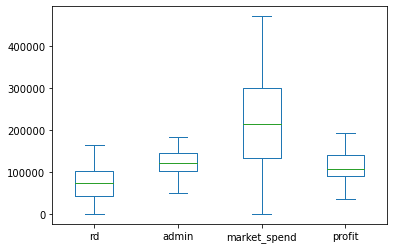

In [13]:
data.plot(kind='box')

In [14]:
data.duplicated().sum()

0

In [15]:
data.corr()

,rd,admin,market_spend,profit
rd,1.000000,0.243438,0.711654,0.978437
admin,0.243438,1.000000,-0.037280,0.205841
market_spend,0.711654,-0.037280,1.000000,0.739307
profit,0.978437,0.205841,0.739307,1.000000


In [16]:
import statsmodels.formula.api as smf

In [17]:
model=smf.ols('profit~rd+admin+market_spend',data=data).fit()

In [18]:
model.params

Intercept       52382.439251
rd                  0.783002
admin              -0.022201
market_spend        0.025234
dtype: float64

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           8.85e-32
Time:                        10:48:29   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rd               0.7830      0.038     20.470      0.000       0.706       0.860
admin           -0.0222      0.043     -0.518      0.607      -0.109       0.064
market_spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model.resid

0      1545.153001
1      4254.937773
2     10474.863604
3     10440.845358
4     -4675.546721
5     -5591.463177
6     -1618.828633
7     -3595.135318
8       882.943059
9     -4476.886778
10    10614.157318
11     8786.544379
12    12229.920551
13     6527.220861
14   -16692.754796
15   -16020.901975
16     9555.302079
17    -5038.256295
18    -4862.334457
19     6135.856879
20     1376.298134
21    -6597.999038
22    -4895.967796
23    -1869.149045
24    -5499.033877
25     4006.285615
26    -5814.098935
27    -9907.855026
28      255.150566
29    -2052.981761
30     -718.820227
31    -1604.653693
32    -2897.901335
33    -2183.383136
34     6160.492191
35     4770.221328
36    13627.635745
37     -773.363244
38     9796.038044
39    -4141.615646
40     1614.399697
41     1306.684825
42     -993.904974
43     7166.930282
44    -1825.401107
45    14468.782794
46    -8847.693625
47    -6816.046655
48   -15984.686812
dtype: float64

In [21]:
model_influ=model.get_influence()
(c,_)=model_influ.cooks_distance

<StemContainer object of 3 artists>

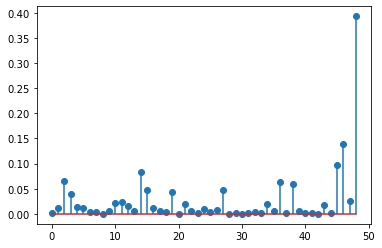

In [22]:
plt.stem(np.arange(len(data)),np.round(c,3))

In [23]:
np.argmax(c),np.max(c)

(48, 0.39274420556321554)

In [24]:
data.drop(index=[48],inplace=True)

In [25]:
data.reset_index(drop=True,inplace=True)

In [26]:
data.corr()

,rd,admin,market_spend,profit
rd,1.000000,0.173065,0.692606,0.978661
admin,0.173065,1.000000,-0.144120,0.110473
market_spend,0.692606,-0.144120,1.000000,0.718207
profit,0.978661,0.110473,0.718207,1.000000


In [27]:
model1=smf.ols('profit~rd+market_spend',data=data).fit()

In [28]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     553.1
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           2.09e-32
Time:                        10:48:31   Log-Likelihood:                -494.44
No. Observations:                  48   AIC:                             994.9
Df Residuals:                      45   BIC:                             1001.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.127e+04   2376.280     21.574      0.000    4.65e+04    5.61e+04
rd               0.7695      0.034     22.636      0.000       0.701       0.838
market_spend     0.0241      0.013      1.899      0.064      -0.001       0.050
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.282
Skew:                           0.016   Prob(JB):                        0.868
Kurtosis:                       2.626   Cond. No.                     5.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
model1_inf=model1.get_influence()
(c,_)=model1_inf.cooks_distance

<StemContainer object of 3 artists>

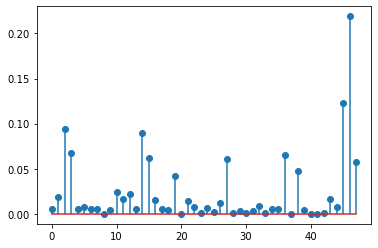

In [30]:
plt.stem(np.arange(len(data)),np.round(c,3))

In [31]:
np.argmax(c),np.max(c)

(46, 0.2187017512375176)

In [32]:
from statsmodels.graphics.regressionplots import influence_plot

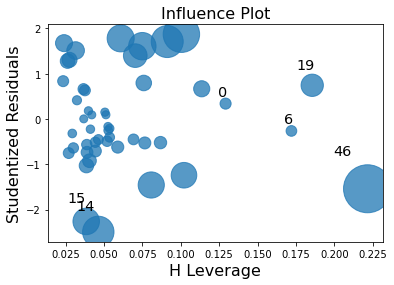

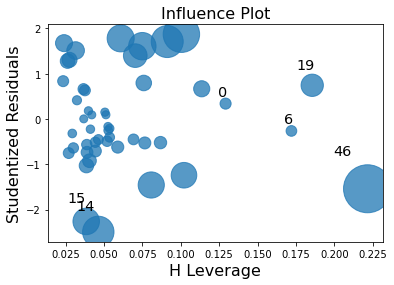

In [33]:
influence_plot(model1)

In [34]:
data.drop(index=[46,19],inplace=True)

In [35]:
data.reset_index(drop=True,inplace=True)

In [36]:
data

,rd,admin,market_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [37]:
model2=smf.ols('profit~rd+market_spend',data=data).fit()

In [38]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     530.9
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           4.89e-31
Time:                        10:48:33   Log-Likelihood:                -473.04
No. Observations:                  46   AIC:                             952.1
Df Residuals:                      43   BIC:                             957.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      5.12e+04   2407.038     21.272      0.000    4.63e+04    5.61e+04
rd               0.7289      0.040     18.226      0.000       0.648       0.810
market_spend     0.0392      0.015      2.594      0.013       0.009       0.070
==============================================================================
Omnibus:                        0.065   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.968   Jarque-Bera (JB):                0.261
Skew:                           0.032   Prob(JB):                        0.877
Kurtosis:                       2.636   Cond. No.                     5.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
model2.resid

0      2038.118160
1      4667.164382
2     12009.550475
3     11441.520405
4     -2953.799990
5     -4563.737256
6      1789.620944
7     -3123.165765
8       927.878407
9     -3299.380906
10    11649.861820
11     9885.075207
12    12170.159980
13     6145.308519
14   -16084.356236
15   -15025.787518
16     8562.830432
17    -5906.605659
18    -5374.318434
19      -19.061905
20    -8778.831497
21    -6676.456157
22    -3641.193640
23    -4319.554834
24     3658.748479
25    -5632.059849
26   -12599.739774
27     -697.325738
28    -2218.326485
29      -25.708219
30    -1740.050067
31    -1800.536544
32    -3287.578084
33     3406.544150
34     3680.596967
35    10728.470902
36    -1099.932221
37     8019.044802
38    -5162.248973
39     -695.185302
40     -182.004198
41    -2737.311899
42     5862.089480
43    -3277.731307
44    12921.011301
45    -8641.606354
dtype: float64

In [41]:
def standardize(vals):
    return (vals-vals.mean())/vals.std()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

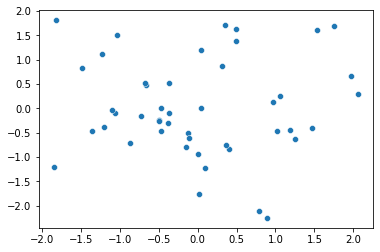

In [42]:
sns.scatterplot(standardize(model2.fittedvalues),standardize(model2.resid))

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

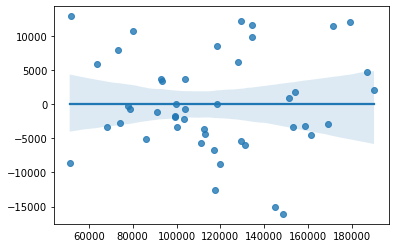

In [43]:
sns.regplot(model2.fittedvalues,model2.resid)

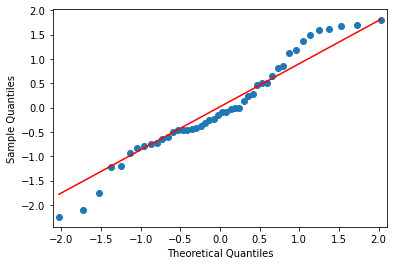

In [44]:
import statsmodels.api as sm
qq=sm.qqplot(standardize(model2.resid),line='q')

In [45]:
list(np.where(standardize(model.resid)<(-1.5)))

[array([14, 15, 48], dtype=int64)]

In [46]:
data.drop(index=[14, 15],inplace=True)

In [47]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     530.9
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           4.89e-31
Time:                        10:50:09   Log-Likelihood:                -473.04
No. Observations:                  46   AIC:                             952.1
Df Residuals:                      43   BIC:                             957.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      5.12e+04   2407.038     21.272      0.000    4.63e+04    5.61e+04
rd               0.7289      0.040     18.226      0.000       0.648       0.810
market_spend     0.0392      0.015      2.594      0.013       0.009       0.070
==============================================================================
Omnibus:                        0.065   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.968   Jarque-Bera (JB):                0.261
Skew:                           0.032   Prob(JB):                        0.877
Kurtosis:                       2.636   Cond. No.                     5.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
data.reset_index(inplace=True,drop=True)

In [49]:
model3=smf.ols('profit~rd+market_spend',data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     660.7
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           6.44e-32
Time:                        10:50:10   Log-Likelihood:                -447.63
No. Observations:                  44   AIC:                             901.3
Df Residuals:                      41   BIC:                             906.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.111e+04   2159.715     23.667      0.000    4.68e+04    5.55e+04
rd               0.7578      0.037     20.586      0.000       0.683       0.832
market_spend     0.0328      0.014      2.396      0.021       0.005       0.060
==============================================================================
Omnibus:                        3.373   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.185   Jarque-Bera (JB):                2.554
Skew:                           0.443   Prob(JB):                        0.279
Kurtosis:                       2.220   Cond. No.                     5.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
model3.resid

0       376.532629
1      2906.010853
2     10282.086383
3      9817.351868
4     -4621.881072
5     -5957.321202
6     -1193.448612
7     -4721.507564
8      -467.218493
9     -4817.793276
10    10263.711884
11     8667.010471
12    11149.514214
13     5196.907377
14     8093.564966
15    -6739.932822
16    -6044.289176
17     -217.046324
18    -9031.660766
19    -6779.232018
20    -3547.857397
21    -5555.781686
22     2763.600412
23    -6860.614038
24   -12327.690803
25    -1759.830163
26    -3338.652390
27    -1144.461486
28    -2852.707762
29    -3249.504116
30    -3425.159651
31     3506.448142
32     3758.499029
33    11279.726586
34    -1020.350985
35     8712.233760
36    -5064.843068
37     -328.517176
38      156.094532
39    -2382.081358
40     5730.120849
41    -3648.813875
42    12992.357747
43    -8553.574424
dtype: float64

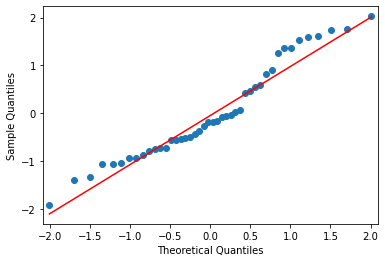

In [51]:
import statsmodels.api as sm
qq=sm.qqplot(standardize(model3.resid),line='q')

In [52]:
data.tail()

,rd,admin,market_spend,state,profit
39,23640.93,96189.63,148001.11,California,71498.49
40,15505.73,127382.30,35534.17,New York,69758.98
41,22177.74,154806.14,28334.72,California,65200.33
42,1000.23,124153.04,1903.93,New York,64926.08
43,0.00,135426.92,0.00,California,42559.73


In [53]:
d1=pd.DataFrame({'rd':15505.73,"market_spend":35534.17},index=[1])

In [54]:
d1

,rd,market_spend
1,15505.73,35534.17


In [55]:
model3.predict(d1)

1    64028.859151
dtype: float64

In [56]:
import joblib

In [57]:
joblib.dump(model3,'50_StartUp_Final.pkl')